# Statistics and Probability
## First Block

We have the following p.d.f. $\frac{d\Gamma}{d\cos\theta}$ with a parameter $P_{\mu} \in [-1,1]$

$$
\frac{d\Gamma}{d\cos\theta}=\frac{1}{2}\big(1-\frac{1}{3}P_{\mu}\cos\theta\big)
$$

The variable $\theta$ represents the angle between the muon and electron polarizations, thus $\theta \in [-\pi,0]$ which means that $\cos \theta \in [-1,1]$. It can be checked that this function fulfills all the conditions in order to be a p.d.f. 

#### 1. Positive Semi-Defined Function
Both $P_{\mu}$ and $\cos \theta$ are constrained in the interval $[-1,1]$. Therefore:

\begin{eqnarray}
\frac{1}{2}\big(1-\frac{1}{3}\big) \leqslant & \frac{1}{2}\big(1-\frac{1}{3}P_{\mu}\cos\theta\big) & \leqslant \frac{1}{2}\big(1-\frac{-1}{3}\big) \\
\frac{1}{3} \leqslant & \frac{1}{2}\big(1-\frac{1}{3}P_{\mu}\cos\theta\big) & \leqslant \frac{2}{3}
\end{eqnarray}


#### 2. Normalized Function
To simplify the calculations, we will use $\cos \theta$ as our variable. 

\begin{eqnarray}
\int_{-1}^{1} \frac{1}{2}\big(1-\frac{1}{3}P_{\mu}\cos\theta\big) d\cos\theta = \frac{1}{2}\int_{-1}^{1} d\cos\theta -\frac{1}{6}P_{\mu}\int_{-1}^{1} \cos\theta d\cos\theta = \Big[\frac{1}{2}\cos\theta-\frac{1}{12}P_{\mu}\cos^2\theta \Big]_{-1}^{1}=\frac{1}{2}(1-(-1))-\frac{1}{12}P_{\mu}(1-(-1)^2)=1
\end{eqnarray}


#### 3. Plot of the PDF
Let's now plot the normalized differential probability density function $\frac{d\Gamma}{d\cos\theta}$. First, we will initialize several Python libraries which we be useful during this problem set. 

In [2]:
# sets the plots to be embedded in the notebook
%matplotlib inline 

# Import useful python libraries 
import numpy as np # library to work with arrays
import matplotlib.pyplot as plt # plotting library (all weird commands starting with plt., ax., fig. are matplotlib
                                # they are not important, the define plots and set labels, axis...)
import random # (pseudo-)random numbers generation
import scipy.stats as stat # extra statistical functions (the basic are included in numpy)

Define the $\frac{d\Gamma}{d\cos\theta}$ function, using the angle $\theta$ and the muon polarization $P_{\mu}$ as input variables:

In [3]:
def gamma(cost,Pmu):
    dg=.5*(1-Pmu*cost/3)
    return dg

We are now ready to plot the $d\Gamma$ probability density function.

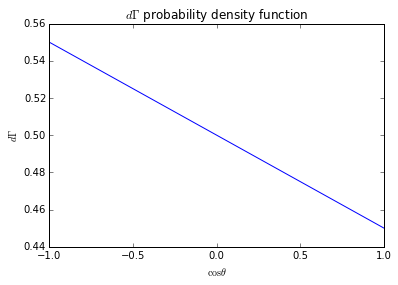

In [4]:
# Define parameters
Pmu=0.3
# Define plot variables
cost=np.linspace(-1,1,201)
dG=gamma(cost,Pmu)
# Plot
fig=plt.figure(1)
ax=fig.add_subplot(111)
ax.plot(cost,dG)
ax.set_title('$d\Gamma$ probability density function')
ax.set_xlabel(r'$\cos\theta$')
ax.set_ylabel('$d\Gamma$')

[Mariona]: I've never really used the ax. command because it increases the 
complexity of the code quite significantly. I've written below how i'd personally plot the figure, which consists on using the regular plt. command. If you try it out, you'll see we get the same results!: 

In [5]:
'''
plt.figure(1)
plt.plot(cost, dG)
plt.title('$d\Gamma$ probability density function')
plt.xlabel(r'$\cos\theta$')
plt.ylabel('$d\Gamma$')
'''

"\nplt.figure(1)\nplt.plot(cost, dG)\nplt.title('$d\\Gamma$ probability density function')\nplt.xlabel(r'$\\cos\theta$')\nplt.ylabel('$d\\Gamma$')\n"

# 2. Build a Monte Carlo able to generate this PDF 


[Oriol]: Nota sobre python y los bucles: Python es muy bonito y simple, pero se le atragantan un poco los bucles. Por suerte, numpy esta hecho en C, cosa que agiliza muchísimo la ejecución. Tanto en el try-teject como en el inverse function hay una comparación. Teneis que descomentar el timeit para ver la comparación de tiempo y comentarlo para poderlo ejecutar correctamente.

### Try-Reject p.d.f generation

We will construct our Monte Carlo with the Try-Reject method.

Without using Numpy explicitly:

In [6]:
#%%timeit # returns the elapsed time when executing the cell, it executes the cell more than once, 
         # thus, it should only be uncommented when desired
# Montecarlo try-reject
N=10000000 
# Define fmax
# The goal is to have the lowest fmax possible in order to increase the efficiency of the try-reject, knowing 
# the shape of the p.d.f. this can be trivially done, because we know its maximum value must be either at 1 or -1
fmax=max(gamma(-1,Pmu),gamma(1,Pmu))

Xi1=np.empty(N) # Declaring an array instead of making it grow inside a loop speeds a lot the computation time
i=0
while i<N:
    # 1st step of the try reject, choose a point inside the area [a,b]x[0,fmax]
    r=random.random()
    x=-1+2*r
    y=random.random()*fmax
    # 2nd step, check if it is inside the p.d.f. area and save x€[a,b] to Xi1, otherwise, reject it
    if gamma(x,Pmu)>=y:
        Xi1[i]=x
        i+=1

Using Numpy:

In [7]:
#%%timeit
N=10000000
# 1st step of the try reject, choose a point inside the area [a,b]x[0,fmax]
# now, all N desired number are generated at once with numpy, thus, as some of them will be rejected, 2*N 
# random numbers are generated
x=-1+2*np.random.random(2*N)           
y=fmax*np.random.random(2*N)
# 2nd step, check if it is inside the p.d.f. area and save x€[a,b] to Xi1, otherwise, reject it
# in addition, as  2*N were generated in order to be safe and less than N x values will have been rejected
# a sample of size N must be chosen in order to compare with the other methods.
Xi2=x[y<=gamma(x,Pmu)][:N]

Plot the results of the Try-Reject Method:

(0.4, 0.6)

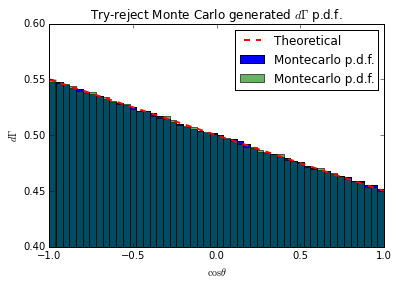

In [8]:
fig=plt.figure(2)
ax=fig.add_subplot(111)
ax.hist(Xi1,color='b',normed=1,bins=50,label='Montecarlo p.d.f.')
ax.hist(Xi2,color='g',normed=1,bins=50,label='Montecarlo p.d.f.',alpha=0.6)
ax.plot(cost,dG,'r--',linewidth=2,label='Theoretical')
ax.set_title('Try-reject Monte Carlo generated $d\Gamma$ p.d.f.')
ax.set_xlabel(r'$\cos\theta$')
ax.set_ylabel('$d\Gamma$')
ax.legend()
ax.set_ylim([0.4,0.6])

### Inverse function p.d.f. generation
To generate a p.d.f via the inverse method we need the inverse of the cumulative function. The cumulative function was found in the first question while checking that the p.d.f. was normalized, thus:

$$
F(\cos\theta)=\Big[\frac{1}{2}z-\frac{1}{12}P_{\mu}z^2 \Big]_{-1}^{\cos\theta}=\frac{1}{2}(\cos\theta+1)-\frac{1}{12}P_{\mu}(\cos^2\theta-1) 
$$

$$
\frac{P_{\mu}}{12}\cos^2\theta-\frac{\cos\theta}{2}+r-\frac{1}{2}-\frac{P_{\mu}}{12}=0 \quad \rightarrow \quad F^{-1}(r)=\cos\theta=\frac{3}{P_{\mu}}\pm \frac{6}{P_{\mu}}\sqrt{\frac{1}{4}-\frac{P_{\mu}}{3}(r-\frac{1}{2}-\frac{P_{\mu}}{12})}
$$

In [9]:
# Inverse function F^{-1}(r) implemented in Python
def Finv(r,Pmu): 
    # its arguments are:
    #     r   : either int, float or np.array. Must be a value between 0 and 1
    #     Pmu : either int, float or np.array, its shape must be compatible with r in case of arrays
    cost=(3.-6.*np.sqrt(.25-Pmu/3.*(r-.5-Pmu/12)))/Pmu
    return cost

(without numpy explicitely)

In [10]:
#%%timeit
N=10000000
Xinv1=np.empty(N)
for i in xrange(N):
    r=random.random()
    Xinv1[i]=Finv(r,Pmu)

(with numpy magic)

In [11]:
# Montecarlo inverse function
def Montecarlo_inv_fun(Pmu,N=1000000):
    # its arguments are:
    #     Pmu : np.array containing the value or values of Pmu for which the pdf will be generated
    # Optional arguments:
    #     N   : int, number of values in the pdf sample
    m=len(Pmu)
    #v.1
    PmuV=np.array([Pmu]) #Transform Pmu into an 1xm matrix so that it matches the dimensions of r (Nxm)
    r=np.random.random((N,m))
    #v.2
    #PmuV=np.empty((m,1))
    #PmuV[:,0]=Pmu
    #r=np.random.random((m,N))
    Xinv=Finv(r,PmuV)
    return Xinv

In [12]:
Xinv2=Montecarlo_inv_fun(np.array([Pmu]),10000000)[:,0] 
# Now, in order to make the function compatible with arrays, Pmu must be reshaped into a np.array and 
# afterwards, the obtained sample is converted from Nx1 matrix to vector of length N

[Oriol] The execution time of the code without using numpy own methods is 18 seconds, whereas knowing numpy reduces it to 0.45 seconds (results with my computer with many things opened)

(0.4, 0.6)

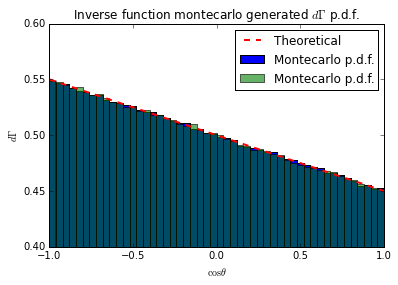

In [13]:
#Plot for the inverse function method
fig=plt.figure(2)
ax=fig.add_subplot(111)
ax.hist(Xinv1,color='b',normed=1,bins=50,label='Montecarlo p.d.f.')
ax.hist(Xinv2,color='g',normed=1,bins=50,label='Montecarlo p.d.f.',alpha=0.6)
ax.plot(cost,dG,'r--',linewidth=2,label='Theoretical')
ax.set_title('Inverse function montecarlo generated $d\Gamma$ p.d.f.')
ax.set_xlabel(r'$\cos\theta$')
ax.set_ylabel('$d\Gamma$')
ax.legend()
ax.set_ylim([0.4,0.6])

### Estimate distribution parameters
In this section, the rellevant parameters of the p.d.f. will be estimated from the montecarlo generated sample. To be able to compare this values, the theoretical values will also be obtained:

$$
\int_{-1}^{1} \frac{1}{2}\big(1-\frac{1}{3}P_{\mu}\cos\theta\big) \cos\theta d\cos\theta = \Big[\frac{\cos^2\theta}{4}-\frac{P_{\mu}}{6}\frac{\cos^3\theta}{3}\Big]_{-1}^{1}=\frac{-P_{\mu}}{9}
$$

In [14]:
mu=np.mean(Xinv2)
sigma=np.std(Xinv2) # equivalent to np.sqrt(np.var(Xi1))
skewness=stat.skew(Xinv2)
kurtosis=stat.kurtosis(Xinv2)

print 'The try-reject montecarlo generated distribution has:\n\tmean = %.6f,\n\t\
sigma = %.6f,\n\tskewness = %.6f\n\tand kurtosis = %.6f' %(mu, sigma, skewness, kurtosis)

The try-reject montecarlo generated distribution has:
	mean = -0.033371,
	sigma = 0.576450,
	skewness = 0.069493
	and kurtosis = -1.192082


# Part 3
The $\frac{d\Gamma}{d\cos\theta}$ mean depends on the polarisation $P_{\mu}$ in a simple manner: theoretical mean = -$P_{\mu}$/9. 

### 3.1. Show that the Monte Carlo predicts this dependency by changing the value of $P_{\mu}$

In [15]:
N=int(1e7)
PmuVec=np.linspace(-1,1,30)  # array of Pmu valus for which the pdf sample will be generated
X=Montecarlo_inv_fun(PmuVec,N) # call Montecarlo_inv_fun, which returns a matrix, containing N x values
# following the pdf of each Pmu in PmuVec
mu=np.mean(X,axis=0) # estimate the mean for each Pmu, thus, the result is a vector of the same length as PmuVec 
muTh=-PmuVec/9. # calculate the theoretical mean for each Pmu

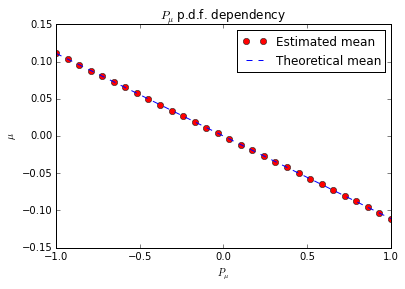

In [16]:
fig=plt.figure(1)
ax=fig.add_subplot(111)
ax.plot(PmuVec,mu,'ro',PmuVec,muTh,'b--')
ax.set_title('$P_{\mu}$ p.d.f. dependency')
ax.set_xlabel(r'$P_{\mu}$')
ax.set_ylabel('$\mu$')
ax.legend(['Estimated mean','Theoretical mean'])

### 3.2. What is the variance of the parameter $P_{\mu}$? Compute it numerically using Monte Carlo techniques for a given $P_{\mu}$ value.

Perform Monte Carlo simulation for a given Pmu value (called "Pmu_chosen_value") and sample size. We will obtain a vector $X = \{x_{1}, x_{2}, ...., x_{N}\}$

In [17]:
sample_size = int(1e5)
Pmu_chosen_value = 0.5 #Choose a value of Pmu for this exercise
vec_length = 50  # Choose the length of the array "get_PmuVec"
get_PmuVec = np.ones(vec_length)*Pmu_chosen_value  # Create vector with length = 50 filled with a given Pmu value from which the pdf sample will be generated

get_Pmus = Montecarlo_inv_fun(get_PmuVec, sample_size) # call Montecarlo_inv_fun, which returns a matrix with dimensions (sample_size X vec_length), containing x values
# following the pdf of each Pmu_chosen_value in get_PmuVec

Calculate the variance of the estimated Pmu both with the estimated mu and the theoretical mu and compare them.

In [18]:
estimated_mean = np.mean(get_Pmus, axis=0) #Get estimated mean 
estimated_Pmu = -9*estimated_mean  # estimate the mean for each Pmu. The result is a vector of the same length as PmuVec 
variance1 = np.var(estimated_Pmu, ddof = 1) #Estimate the variance of the estimated Pmu. The "ddof" is used so that the division is not done as 1/N but as 1/N-1
variance2 = (sum((estimated_Pmu-Pmu_chosen_value)**2))/vec_length 
print variance1 
print variance2 

0.000245893830578
0.000242725161396


We define the variance as: $$Var(X)=E[(x-\mu)^{2}]$$ 

With the `sum` command, we are obtaining the variance with: $$\overline{Var}=\frac{1}{N}\sum(P_{i}-\mu)^{2}$$ where $\mu$ is the theoretical mean. In this case, we have chosen a specific value for Pmu (Pmu_chosen_value = 0.5), so the theoretical mean will simply correspond to this value. 

With the `np.var` command, we are calculating the variance with equation: $$\overline{Var}=\frac{1}{N-1}\sum(P_{i}-\overline{x})$$ 

where $\bar{x}$ is the estimated mean, i.e. $\bar{x}=\frac{1}{N}\sum x_{i}$. Note that `np.var` accepts "delta Degrees of freedom" (ddof) which refers to the factor $1/N-\text{ddof}$. We chose $ddof = 1$ so that the division would be as 1/N-1, instead of 1/N.


 

# Part 4
Generate a continuous series of N events using the Monte Carlo and compute the mean of the distribution and the estimated $P_{\mu}$ as 9*mean. 

### 4.1. Show that the $P_{\mu}$ tends to the true evalue as predicted by the law of large numbers

In [19]:
Pmu_chosen_value = 0.5 #Choose a value of Pmu for this exercise
vec_length = 50  # Choose the length of the array "get_PmuVec"
get_PmuVec = np.ones(vec_length)*Pmu_chosen_value  # Create vector with length = 50 filled with a given Pmu value from which the pdf sample will be generated
num_samples = 20 
sample_sizes = np.logspace(start = 1, stop = 6.5, num = num_samples, dtype=int) #num refers to the nº of points generated between start and stop

estimated_Pmus = np.empty(num_samples)
    
for i,sample_size in enumerate(sample_sizes):
    get_Pmus = Montecarlo_inv_fun(get_PmuVec, sample_size) 
    estimated_mean = np.mean(get_Pmus, axis = 0) #Get estimated mean 
    estimated_Pmus[i] = -9*np.mean(estimated_mean)  # estimate the mean for each Pmu. The result is a vector of the same length as PmuVec 

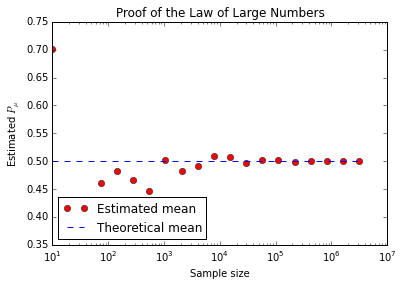

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.semilogx(sample_sizes,estimated_Pmus,'ro',sample_sizes,Pmu_chosen_value*np.ones(num_samples),'b--')
ax.set_title('Proof of the Law of Large Numbers')
ax.set_xlabel('Sample size')
ax.set_ylabel('Estimated $P_{\mu}$')
ax.legend(['Estimated mean','Theoretical mean'],loc=3)

As we can see from the plot, the estimated mean resulting from the first iterations is not very accurate, but as the sample size increases, the estimated mean approaches the theoretical mean --as predicted by the Law of Large Numbers. 

For each given number of trials, we will now plot the residuals between the estimated and the theoretical means.

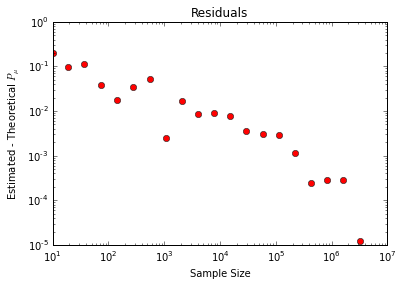

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(sample_sizes, np.abs(estimated_Pmus-Pmu_chosen_value),'ro') #Move the two axes to logarithmic space 
ax.set_title('Residuals')
ax.set_xlabel('Sample Size')
ax.set_ylabel('Estimated - Theoretical $P_{\mu}$')

ATENCION: Intentar demostrar LLN sin generar cada vez la muestra
[Oriol]: Ya he cambiado el código para que no resetee la muestra cada vez. Al empezar a hacerlo directament siguiendo los pasos que tenia en la cabeza he hecho esta primera celda, que de momento dejo porque creo que se entiende mejor (o almenos alguien lo puede entender mejor). Lo que hago es:
1. Generar un vector de N componentes
2. Dividirlo en m tramos (de longitud N/m cadascuno) y hacer la media de cada tramo
3. Calcular la suma cumulativa y dividirla por el numero de celda para obtener la media de los valores anteriores a este.
    - Es decir, en el vector cumulative_Pmus, el valor en la posicion i es la media de los (i+1)*N/m primeros valores de la muestra
    
Esta version tarda 10 segundos aprox para hacer este calculo con $N=10^8$ y $m=5\times10^6$, es decir calcular la media cada 20.

In [30]:
#%%timeit
# Here we demonstrate the law of large numbers without reseting the sample
Pmu_41 = 0.5 #Choose a value of Pmu for this exercise
sample_size_41 = int(1e8) # Size of the sample, then, to estimate the LLN we will use the first m 
                          # to calculate the mean, then the first 2m and so on
m = int(5e6) # Divide the Pmu means vector (of size vec_length_41) into m elements, thus, its legth will be 
X_sample_41 = Montecarlo_inv_fun(np.array([Pmu_41]), sample_size_41)[:,0]
X_divided = np.array(np.split(X_sample_41,m))
partial_means = np.mean(X_divided,axis=1)
N_vec = np.arange(1,m+1)
cumulative_Pmus = -9*np.cumsum(partial_means)/N_vec
N_vec = sample_size_41/m*N_vec

Como la generacion de numeros aleatorios se hace de manera independiente, y nuesto MC trabaja con arrays bidimensionales, podemos entrar los parámetros de manera que el propio montecarlo nos devuelva la matriz Nxm del paso 2 de la explicación.

De este modo, para los mismos N i m, el código tarda 4 segundos.

In [31]:
#%%timeit
# After I did the above cell, I realized that taking into account how we have defined the MC, 
# it can be done in a simpler way thanks to the fact that the random numbers we generate are independent
Pmu_41 = 0.5 #Choose a value of Pmu for this exercise
sample_size_41 = int(1e8) # Size of the sample, then, to estimate the LLN we will use the first m 
                          # to calculate the mean, then the first 2m and so on
m = int(5e6) # Divide the Pmu means vector (of size vec_length_41) into m elements, thus, its legth will be 
X_sample_41 = Montecarlo_inv_fun(np.ones(sample_size_41/m)*Pmu_41, m)
partial_means = np.mean(X_sample_41,axis=1)
N_vec = np.arange(1,m+1)
cumulative_Pmus = -9*np.cumsum(partial_means)/N_vec
N_vec = sample_size_41/m*N_vec

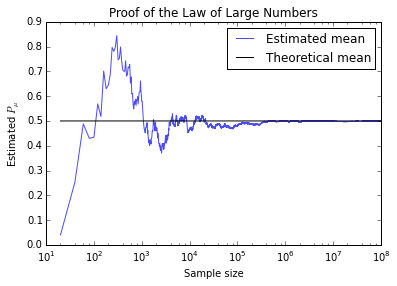

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.semilogx(N_vec,cumulative_Pmus,'b-',alpha=0.7)
ax.semilogx(N_vec,np.ones(m)*Pmu_41,'k')
ax.set_title('Proof of the Law of Large Numbers')
ax.set_xlabel('Sample size')
ax.set_ylabel('Estimated $P_{\mu}$')
ax.legend(['Estimated mean','Theoretical mean'],loc='best')

## Part 5
Generate several Monte Carlo experiments, each with N events.

### 5.1. Build for each experiment the student's t variable for $P_{\mu}$ and show that it follows the Student's t distribution

In [33]:
N = 15 # number of samples for each montecarlo experiment
Pmu_chosen_value = 0.5 #Choose a value of Pmu for this exercise
mu_t=-Pmu_chosen_value/9.
num_repetitions = 15 # number of times the N x num_MC_experiments MC_samples matrix is generated
num_MC_experiments = 500000  # Choose the number of MC experiments to generate (it will be the # of t values in our histogram)
PmuVec_t = np.ones(num_MC_experiments)*Pmu_chosen_value  # Create vector with length = num_MC_experiments filled with a given Pmu value from which the pdf sample will be generated
t_values = np.empty(num_repetitions*num_MC_experiments)

for repeat in xrange(num_repetitions):
    MC_samples = Montecarlo_inv_fun(PmuVec_t, N) # matrix N x num_MC_experiments
    x_bar = np.mean(MC_samples, axis=0) #Get estimated mean
    s_square = np.var(MC_samples, axis=0, ddof=1) #Get estimated variance (sigma^2)
    t_values[repeat*num_MC_experiments:(repeat+1)*num_MC_experiments] = np.sqrt(N/s_square)*(x_bar-mu_t)

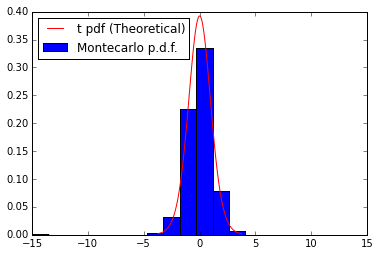

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
lim_prob = 0.001
grid_num = 100
x = np.linspace(stat.t.ppf(lim_prob, N), stat.t.ppf(1-lim_prob, N), grid_num)
ax.plot(x, stat.t.pdf(x, N), 'r-', label='t pdf (Theoretical)')
ax.hist(t_values,color='b',normed=1, bins = 20,label='Montecarlo p.d.f.')
ax.legend(loc=2)

Calculate the moments of the distribution:

In [35]:
mu_t = np.mean(t_values)
sigma_t = np.std(t_values) # equivalent to np.sqrt(np.var(Xi1))
skewness_t =stat.skew(t_values)
kurtosis_t =stat.kurtosis(t_values)

print '\tmean = %.6f,\n\t\
sigma = %.6f,\n\tskewness = %.6f\n\tand kurtosis = %.6f' %(mu_t, sigma_t, skewness_t, kurtosis_t)

	mean = -0.018634,
	sigma = 1.091315,
	skewness = -0.120590
	and kurtosis = 1.167964


For the values to follow a Gaussian distribution, the skewness factor would have to be 0 (sknewness measures symmetry, and Gaussian is 100% symmetrical), and the kurtosis factor would also have to be 0. Since none of these parameters is 0, the distribution is not Gaussian.

### 5.2. Show the validity of the Cetral Limit Theorem

In [36]:
N_clt = int(1e6)

Pmu_chosen_value = 0.5 #Choose a value of Pmu for this exercise
mu_t=-Pmu_chosen_value/9.
num_repetitions = 15 # number of times the N x num_MC_experiments MC_samples matrix is generated
num_MC_experiments = 200  # Choose the number of MC experiments to generate (it will be the # of t values in our histogram)
PmuVec_t = np.ones(num_MC_experiments)*Pmu_chosen_value  # Create vector with length = num_MC_experiments filled with a given Pmu value from which the pdf sample will be generated
clt_values = np.empty(num_repetitions*num_MC_experiments)

for repeat in xrange(num_repetitions):
    MC_samples = Montecarlo_inv_fun(PmuVec_t, N_clt) # matrix N x num_MC_experiments
    x_bar = np.mean(MC_samples, axis=0) #Get estimated mean
    s_square = np.var(MC_samples, axis=0, ddof=1) #Get estimated variance (sigma^2)
    clt_values[repeat*num_MC_experiments:(repeat+1)*num_MC_experiments] = np.sqrt(N_clt/s_square)*(x_bar-mu_t)


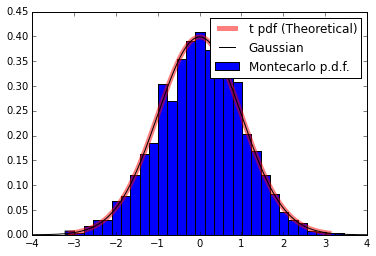

In [37]:
# Expected gaussian pdf
mu = 0
sigma = 1
dist = stat.norm(mu, sigma)
x_pdf = np.linspace(-4, 4, 1000)

#Plot distributions
fig = plt.figure()
ax = fig.add_subplot(111)
lim_prob = 0.001
grid_num = 100
x = np.linspace(stat.t.ppf(lim_prob, N_clt), stat.t.ppf(1-lim_prob, N_clt), grid_num)
ax.plot(x, stat.t.pdf(x, N_clt), 'r-', lw=5, alpha=0.5, label='t pdf (Theoretical)')
ax.hist(clt_values,color='b',normed=1,bins=30,label='Montecarlo p.d.f.')
ax.plot(x_pdf, dist.pdf(x_pdf), '-k', label = 'Gaussian')
ax.legend()

Calculate the moments of the distribution:

In [38]:
mu_clt = np.mean(clt_values)
sigma_clt = np.std(clt_values) 
skewness_clt =stat.skew(clt_values)
kurtosis_clt =stat.kurtosis(clt_values)

print '\tmean = %.6f,\n\t\
sigma = %.6f,\n\tskewness = %.6f\n\tand kurtosis = %.6f' %(mu_clt, sigma_clt, skewness_clt, kurtosis_clt)

	mean = 0.009384,
	sigma = 1.010664,
	skewness = -0.064596
	and kurtosis = -0.003371


Both the skewness and kurtosis factors are approximately zero, which implies the distribution is Gaussian.

### Part 6

Generate N random events according to the probability density function $\frac{d\Gamma}{d\cos\theta}$ and fill the obtained $\cos\theta$ values in a histogram. 

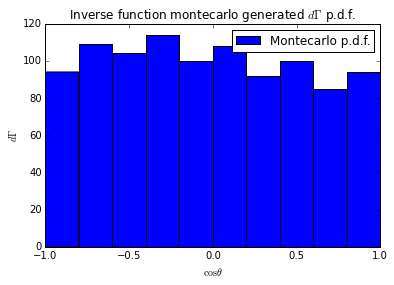

In [56]:
Pmu = 0.3  
num_sample_values = 1000

Xinv6 = Montecarlo_inv_fun(np.array([Pmu]),num_sample_values)[:,0] #Run Montecarlo with Pmu as a fixed parameter

fig = plt.figure()
ax = fig.add_subplot(111)

# Create the histogram (note: it's NOT normalized)
N_bin, bins, lis = ax.hist(Xinv6,color='b',bins=10,label='Montecarlo p.d.f.') 
# N_bin is an array containing the values of the histogram bins
# bins is an array with the edges of the bins.
# The last parameter will not be used here. 

ax.set_title('Inverse function montecarlo generated $d\Gamma$ p.d.f.')
ax.set_xlabel(r'$\cos\theta$')
ax.set_ylabel('$d\Gamma$')
ax.legend()


### 6.1. What is the probability density function associated to the number of entries per bin?

Pasos del algoritmo 6.1:
- Generar `num_sample` mustras de $\cos\theta$ siguiendo la pdf del enunciado con MC
- Hacer el histograma
- Guardar el valor de entradas en el primer bin (podria ser cualquier bin), lo llamamos `binomy`
- Repetir los tres primeros pasos `binomial_sample` veces
- Comprovar que las muestras guardadas en `binomy` siguen una binomial de $N$ 

In [57]:
num_sample = 100
binomial_sample = 10000  
Pmu_chosen_value = -0.3
bin_number = 4
PmuVec_61 = np.ones(binomial_sample)*Pmu_chosen_value  # Create vector with length = num_MC_experiments filled with a given Pmu value from which the pdf sample will be generated

X_61 = Montecarlo_inv_fun(PmuVec_61,num_sample) #Run Montecarlo with Pmu as a fixed parameter
N_61 = np.empty(binomial_sample)

for i in xrange(binomial_sample):
    hist, bin_edges = np.histogram(X_61[:,i],range=(-1,1)) # fixing the range to -1, 1 avoids the bins to start at the minimum 
    # of the sample which would be min(X_61) (around -0.98 but not -1)
    N_61[i] = hist[bin_number-1]
    

The left and right position of the bins (from the first to the last one) are contained in the "bin_edges" vector. In the cell above, we chose to study the first bin (`bin_number`=1), and to calculate the probability that a point falls within it, we have to select bin_edge[1] rather than bin_edge[0] (as choosing bin_edge[0] would yield probability equal to 0).

In [58]:
bin_edges

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

We can use the cumulative function to calculate the probability that a point falls within the bin.

In [59]:
def Fcumulative(cost,Pmu): # Cumulative function
    F=.5*(cost+1)-Pmu/12.*(cost**2-1)
    return F

Plot the binominal distribution on top the histogram for bin `bin_number` 

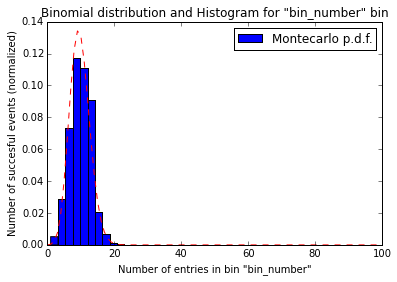

In [60]:
ki=np.arange(num_sample)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(N_61,color='b',bins=10,normed=1,label='Montecarlo p.d.f.')
Prob_bin = Fcumulative(bin_edges[bin_number],Pmu_chosen_value)-Fcumulative(bin_edges[bin_number-1],Pmu_chosen_value)
ax.plot(ki,stat.binom.pmf(ki,num_sample,Prob_bin),'r--')

ax.set_title('Binomial distribution and Histogram for "bin_number" bin')
ax.set_xlabel('Number of entries in bin "bin_number"')
ax.set_ylabel('Number of succesful events (normalized)')
ax.legend()

As shown in this exercise, when the number of values in the sample `num_sample` is fixed, the entries in a given bin follow a binomial distribution. By extension, the number of entries of a given bin with respect to each of the others follows a multinomial distribution.

If the number of entries for the experiment is not fixed, the distribution of the events in the bins follows a Poisson.  

In any case, when the number of entries is very large, the multinominal distribution will behave as a Poisson. And what's more: based on the Central Theorem, this Poisson will in turn tend to a Gaussian.

### 6.2. What is the expected pdf for the number of entries per bin when the number N is very large?

In [61]:
num_sample = int(5e5)
binomial_sample = 1000  
Pmu_chosen_value = -0.3
bin_number = 1
PmuVec_62 = np.ones(binomial_sample)*Pmu_chosen_value  # Create vector with length = num_MC_experiments 
                                #filled with a given Pmu value from which the pdf sample will be generated

X_62 = Montecarlo_inv_fun(PmuVec_62,num_sample) #Run Montecarlo with Pmu as a fixed parameter
N_62 = np.empty(binomial_sample)

for i in xrange(binomial_sample):
    hist, bin_edges = np.histogram(X_62[:,i],range=(-1,1)) # fixing the range to -1, 1 avoids the bins to start at 
                                     #the minimum of the sample which would be min(X_62) (around -0.98 but not -1)
    N_62[i] = hist[bin_number-1]

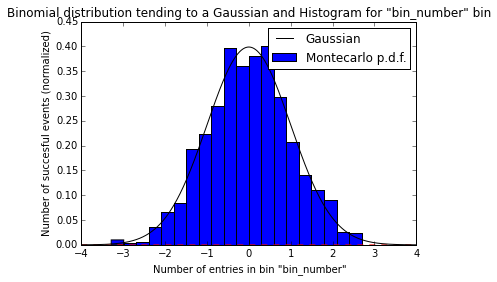

In [62]:
ki=np.arange(num_sample)

# Expected gaussian pdf
plot_center_value = Prob_bin*num_sample
sigma_gaussian = np.sqrt(Prob_bin*num_sample*(1-Prob_bin))
dist = stat.norm(0, 1)

# Shift and scale the histogram with respect to the estimated values. NOTE: Since we cannot generate infinite samples, 
# we'll use np.mean and np.std instead of using the real values given by the theoretical distribution. This is likely
# to have an impact when shifting. 
ki = (ki-np.mean(N_62))/np.std(N_62)
N_62 = (N_62-np.mean(N_62))/np.std(N_62)
x_pdf= np.linspace(-4,4,1000)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(N_62,color='b',bins=20,normed=1,label='Montecarlo p.d.f.')
Prob_bin = Fcumulative(bin_edges[bin_number],Pmu_chosen_value)-Fcumulative(bin_edges[bin_number-1],Pmu_chosen_value)
ax.plot(ki,stat.binom.pmf(ki,num_sample,Prob_bin),'r--')
ax.plot(x_pdf, dist.pdf(x_pdf), '-k', label = 'Gaussian')

ax.set_title('Binomial distribution tending to a Gaussian and Histogram for "bin_number" bin')
ax.set_xlabel('Number of entries in bin "bin_number"')
ax.set_ylabel('Number of succesful events (normalized)')
ax.set_xlim([-4,4])
ax.legend()

Calculate the moments of the N_62 vector

In [63]:
mu_62 = np.mean(N_62)
sigma_62 = np.std(N_62) 
skewness_62 =stat.skew(N_62)
kurtosis_62 =stat.kurtosis(N_62)

print '\tmean = %.6f,\n\t\
sigma = %.6f,\n\tskewness = %.6f\n\tand kurtosis = %.6f' %(mu_62, 
sigma_62, skewness_62, kurtosis_62)

	mean = 0.000000,
	sigma = 1.000000,
	skewness = -0.015540
	and kurtosis = -0.062925


Mean and sigma give 0 and 1 respectively since we have rescaled the N_62 vector. The skewness and kurtosis parameters are approximately 0, which is indicative of a gaussian.

### 6.3. Show that the $\chi^{2}$ of the obtained numbers per bin follows a $\chi^{2}$ distribution. To simplify, you shall use the nominal value obtained from the pdf formula per bin as the central value in the bin 

Use procedure explained in section 6.1

In [150]:
num_sample_63 = 10000
chisquared_sample = 1000 # Number of times we will call the MC function -- the higher this value, the better will the 
                         #theorical Chi squared distribution describe the "observed" one   
Pmu_chosen_value = -0.3
bin_number_63 = 5
PmuVec_63 = np.ones(chisquared_sample)*Pmu_chosen_value  # Create vector with length = num_MC_experiments filled with a given Pmu value from which the pdf sample will be generated

X_63 = Montecarlo_inv_fun(PmuVec_63, num_sample_63) #Run Montecarlo with Pmu as a fixed parameter

We will calculate the mean by multiplying the probability that a value falls within a given bin times the sample number. To this end, we will create a vector `mean` where we will store the $\mu$ of each bin, and use the cumulative function within two bin edges to obtain the probability, `Prob_bin_63`.  



In [151]:
mean_63 = np.empty(bin_number_63)
bin_edges_63 = np.linspace(-1,1,bin_number_63+1) # Note that the dimensions of this parameter are 1x(bin_number+1), since we have 
                                           # to take into account the left-most and right-most bin

Prob_bin_63 = Fcumulative(bin_edges_63[1:], Pmu_chosen_value)-Fcumulative(bin_edges_63[:-1],Pmu_chosen_value)

mean_63 = Prob_bin_63*num_sample_63 #This will be our mu for each bin.

Compute the chi squared for each MC run. 

In [152]:
chi_squared_values = np.empty(chisquared_sample)

for i in xrange(chisquared_sample):
    hist, bin_edges = np.histogram(X_63[:,i],range=(-1,1), bins = bin_number_63) # fixing the range to -1, 1 avoids the bins to start at the minimum 
    # of the sample which would be min(X_63) (around -0.98 but not -1)
 
    chi_squared_values[i] = np.sum((hist-mean_63)**2/(mean_63*(1-Prob_bin_63)))
    

Plot the $\chi_{^2}$ distribution.

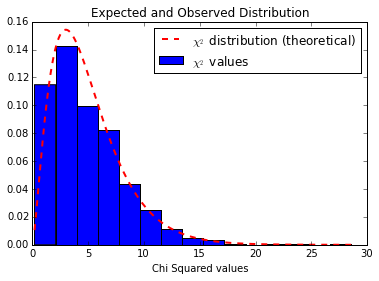

In [153]:
x_pdf_chisquared = np.linspace(min(chi_squared_values),max(chi_squared_values),1000)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(chi_squared_values,color='b', bins=15,normed=1,label = '$\chi_{^2}$ values')
ax.plot(x_pdf_chisquared,stat.chi2.pdf(x_pdf_chisquared,bin_number_63),'r--',lw=2, label = '$\chi_{^2}$ distribution (theoretical)')

ax.set_title('Expected and Observed Distribution')
ax.set_xlabel('Chi Squared values')
ax.legend()

### 6.4. How does the $\chi^{2}$ computed above change when you change the number of bins? 

For this exercise, we can just modify the number of bins in 6.3 to obtain the new results.

* As we increase the number of bins, we see that the observed distribution becomes more similar to a Gaussian (e.g. number of bins = 100 for a sample of 10000). Why? The chi-squared distribution depends ONLY on one parameter, k, which corresponds to the number of bins. If the size of the sample is large enough compared to the number of bins, then when we increase k and let it go to infinity, the Central Limit Theorem applies and the chi squared distribution tends to a Gaussian.

* If we set the number of bins to a very small number --again, with a sample of 10000-- (e.g. 5), the resulting distribution will not look like a Gaussian at all. 



# Part 7

### 7.1.Take one of the histograms generated in the previous step and construct the conditional probability, P(histogram|$P_{\mu}$), of obtaining the entries in the obtained histogram for a given value of $\rho$.

### 7.2. Find the most probable value of $\rho$ used to generate the histogram using the conditional probability  P(histogram|$P_{\mu}$)